# Image cropping with TensorFlow

Here is an example for image processing with TensorFlow.

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0-beta1'

In [2]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

## Loading test image

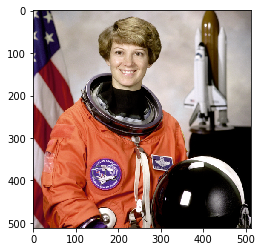

In [3]:
img_rgb = imageio.imread('https://raw.githubusercontent.com/imageio/imageio-binaries/master/images/astronaut.png')
plt.imshow(img_rgb)

In [4]:
img = tf.image.convert_image_dtype(tf.constant(img_rgb), tf.float32)
img = tf.expand_dims(img, axis=0)
img.shape

TensorShape([1, 512, 512, 3])

## [`tf.image.crop_to_bounding_box`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/image/crop_to_bounding_box)

In [5]:
offset_height = 60
offset_width = 300
target_height = 200
target_width = 200
output = tf.image.crop_to_bounding_box(img, offset_height, offset_width, target_height, target_width)
output.shape

TensorShape([1, 200, 200, 3])

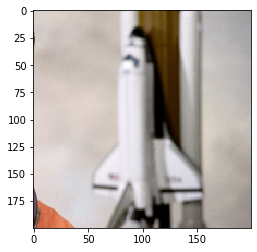

In [6]:
plt.imshow(output[0,:,:,:])

## [`tf.image.resize`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/image/resize)

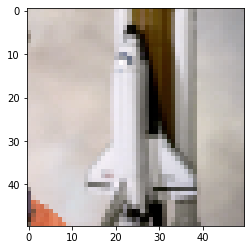

In [7]:
size_after_resizing = [50, 50]
output_resized = tf.image.resize(output, size_after_resizing, method=tf.image.ResizeMethod.BILINEAR)
plt.imshow(output_resized[0,:,:,:])

## [`tf.image.crop_and_resize`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/image/crop_and_resize)

`tf.image.crop_and_resize` is more flexible while arguments get complicated accordingly.

Note that `boxes` takes normalized coordinate values $[0, 1)$ instead of pixels.

In [8]:
_, img_height, img_width, _ = img.get_shape().as_list()

boxes = [[
    offset_height / img_height,
    offset_width / img_width,
    (offset_height + target_height) / img_height,
    (offset_width + target_width) / img_width,
]]
box_indices = [0]
crop_size = size_after_resizing
method = "bilinear"
output_resized2 = tf.image.crop_and_resize(img, boxes=boxes, box_indices=box_indices, crop_size=crop_size, method=method)
output_resized2.shape

TensorShape([1, 50, 50, 3])

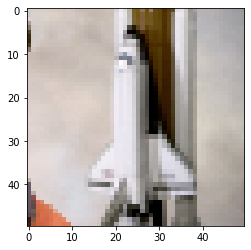

In [9]:
plt.imshow(output_resized2[0,:,:,:])

## Are they the same? -- Not really.

In [10]:
output_resized.get_shape() == output_resized2.get_shape()

True

In [11]:
(output_resized.numpy() == output_resized2.numpy()).all()

False